In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\HP\Downloads\Kim assignments\Data_for_UCI_named.csv")

In [3]:
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
print("Dimension of the original dataset:", data.shape)

Dimension of the original dataset: (10000, 14)


In [5]:
X = data.drop(columns=['stabf'])
y = data['stabf']

In [6]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [7]:
X_pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])

In [8]:
print("Dimension of the modified dataset after PCA:", X_pca_df.shape)

Dimension of the modified dataset after PCA: (10000, 3)


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

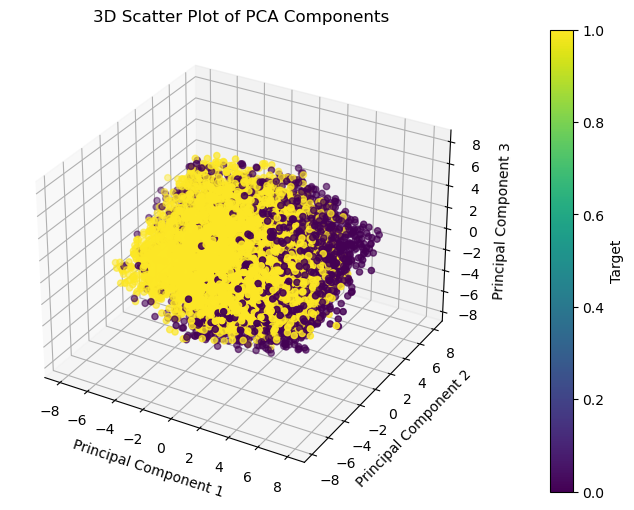

In [11]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_df['PC1'], X_pca_df['PC2'], X_pca_df['PC3'], c=y_encoded, cmap='viridis')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Scatter Plot of PCA Components')

colorbar = plt.colorbar(scatter, ax=ax, pad=0.1)
colorbar.set_label('Target')

ax.grid(True)

plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [13]:
X = data.drop(columns=['stab', 'stabf'])
y = data['stabf']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [16]:
C = svm_classifier.get_params()['C']

In [17]:
y_pred = svm_classifier.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [19]:
print("Model Hyperparameters:")
print("Regularization parameter (C):", C)

Model Hyperparameters:
Regularization parameter (C): 1.0


In [20]:
print("\nPerformance Metrics:")
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)


Performance Metrics:
Accuracy: 0.8135

Classification Report:
               precision    recall  f1-score   support

      stable       0.74      0.71      0.73       693
    unstable       0.85      0.87      0.86      1307

    accuracy                           0.81      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.81      0.81      0.81      2000



In [21]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [22]:
data = pd.read_csv(r"C:\Users\HP\Downloads\Kim assignments\Data_for_UCI_named.csv")

In [23]:
X = data.drop(columns=['stab', 'stabf'])
y = data['stabf']

In [24]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [25]:
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X)

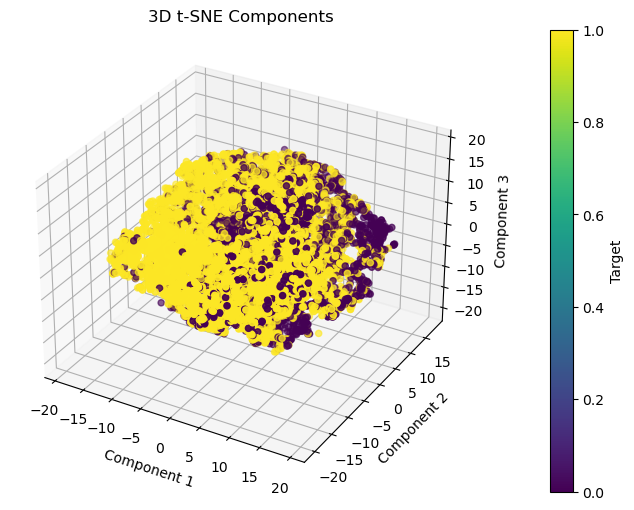

In [26]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=y_encoded, cmap='viridis')

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('3D t-SNE Components')

colorbar = plt.colorbar(scatter, ax=ax, pad=0.1)
colorbar.set_label('Target')

ax.grid(True)

plt.show()

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [28]:
data = pd.read_csv(r"C:\Users\HP\Downloads\Kim assignments\Data_for_UCI_named.csv")


In [29]:
X = data.drop(columns=['stab', 'stabf'])
y = data['stabf']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(X_train, y_train)

SVC()

In [32]:
C = svm_classifier.get_params()['C']
gamma = svm_classifier.get_params()['gamma']

In [33]:
y_pred = svm_classifier.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [35]:
print("Model Hyperparameters:")
print("Regularization parameter (C):", C)
print("Gamma:", gamma)

Model Hyperparameters:
Regularization parameter (C): 1.0
Gamma: scale


In [36]:
print("\nPerformance Metrics:")
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)


Performance Metrics:
Accuracy: 0.886

Classification Report:
               precision    recall  f1-score   support

      stable       0.85      0.81      0.83       693
    unstable       0.90      0.92      0.91      1307

    accuracy                           0.89      2000
   macro avg       0.88      0.87      0.87      2000
weighted avg       0.89      0.89      0.89      2000

